# QP splitting

### Importing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

epsilon_xx_1 = np.loadtxt("epsilon_xx.txt") 
epsilon_xy_1 = np.loadtxt("epsilon_xy.txt") 
epsilon_yy_1 = np.loadtxt("epsilon_yy.txt")

#Region with quantum dot
H_1=100
H_2=1200
L_1=200
L_2=1000

epsilon_xx = epsilon_xx_1[L_1:L_2:1,H_1:H_2:1]
epsilon_xz = -epsilon_xy_1[L_1:L_2:1,H_1:H_2:1]
epsilon_zz = -epsilon_yy_1[L_1:L_2:1,H_1:H_2:1]

plt.figure(1)
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)

plt.subplot(131)
im=plt.imshow(epsilon_xx, cmap=cm.RdBu_r, vmin=-0.02, vmax=0.02)
plt.axis('off')
plt.text(20, 150,'$\epsilon_{xx}$',fontsize=16, fontdict=None, withdash=False)
plt.text(940, 700,'(a)',fontsize=10, fontdict=None, withdash=False)

plt.subplot(132)
im=plt.imshow(epsilon_zz, cmap=cm.RdBu_r, vmin=-0.02, vmax=0.02)
plt.axis('off')
plt.text(20, 150,'$\epsilon_{zz}$',fontsize=16, fontdict=None, withdash=False)
plt.text(940, 700,'(b)',fontsize=10, fontdict=None, withdash=False)

plt.subplot(133)
im=plt.imshow(epsilon_xz, cmap=cm.RdBu_r, vmin=-0.02, vmax=0.02)
plt.axis('off')
plt.text(20, 150,'$\epsilon_{xz}$',fontsize=16, fontdict=None, withdash=False)
plt.text(940, 700,'(c)',fontsize=10, fontdict=None, withdash=False)

cbar_ax = fig.add_axes([0.11, 0.34, 0.8, 0.02])

cbar=plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(4)

#plt.savefig('epsilon.eps')
plt.show()


H_1=100
H_2=1000
L_1=500
L_2=700

dimx=H_2-H_1
dimy=L_2-L_1

epsilon_xx = epsilon_xx_1[L_1:L_2:1,H_1:H_2:1]
epsilon_xz = -epsilon_xy_1[L_1:L_2:1,H_1:H_2:1]
epsilon_zz = -epsilon_yy_1[L_1:L_2:1,H_1:H_2:1]

/Users/paulsokolov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
/Users/paulsokolov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
/Users/paulsokolov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
/Users/paulsokolov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: Matp

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 4 Axes>

### Calculating of EFG tensor components

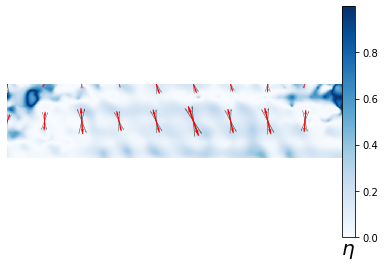

In [2]:
import math

def EFG(nuclearSpecies):
    if nuclearSpecies == '115In':
        S11 = 1.6e16   # [StatC/cm^3]
        S12=-S11/2
        S44= -1e16
    if nuclearSpecies == '69Ga':
        S11 = 9.1e15   # [StatC/cm^3]
        S12=-S11/2
        S44= -9.2e15 
    if nuclearSpecies == '71Ga':
        S11 = 9.1e15   # [StatC/cm^3]
        S12=-S11/2
        S44= -9.2e15
    if nuclearSpecies == '75As':
        S11 = 13e15   # [StatC/cm^3]
        S12=-S11/2
        S44= -25.2e15
        
    global V_ZZ,V_YY,V_XX, n, m, eta, angles, vec
        
    n=epsilon_xx.shape[0]
    m=epsilon_xx.shape[1]
    
    eta=np.zeros((n,m))
    vec=np.zeros((n,m,3))
    V_ZZ=np.zeros((n,m))
    V_XX=np.zeros((n,m))
    V_YY=np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            V=np.array([[S12*(epsilon_zz[i,j]-epsilon_xx[i,j]), 0, S44*epsilon_xz[i,j]], 
                    [0, (S12+S11)*epsilon_xx[i,j]+S12*epsilon_zz[i,j], S44*epsilon_xz[i,j]],
                    [S44*epsilon_xz[i,j], S44*epsilon_xz[i,j],2*S12*epsilon_xx[i,j]+S11*epsilon_zz[i,j]]])
            
            w,v = np.linalg.eig(V)
        
            max1=max(enumerate(abs(w)),key=lambda x: x[1])[0]
            V_ZZ[i,j]=w[max1]
            w[max1]=1

            max2=max(enumerate(abs(w)),key=lambda x: x[1])[0]

            V_YY[i,j]=w[max2]
            w[max2]=1

            max3=max(enumerate(abs(w)),key=lambda x: x[1])[0]
            V_XX[i,j]=w[max3]
            
            eta[i,j]=(V_XX[i,j]-V_YY[i,j])/V_ZZ[i,j]
            
            vec[i,j]=v[max1]
            
EFG('71Ga')  

fig, ax = plt.subplots()

X,Y = np.meshgrid(np.arange(0,np.size(epsilon_xx[0,:]),1),np.arange(0,np.size(epsilon_xx[:,0]),1))

angles=np.zeros((n,m))

for i in range(n):
    for j in range(m):
        angles[i,j]=math.atan(vec[i,j,2]/vec[i,j,0])*180/np.pi

step=100

ax.quiver( X[::step, ::step], Y[::step, ::step], V_ZZ[::step, ::step], V_ZZ[::step, ::step], 
            angles=angles[::step, ::step]+180+0.2*angles[::step, ::step], minshaft=10, pivot='middle', color='k', units='dots',alpha=0.4)
ax.quiver( X[::step, ::step], Y[::step, ::step], V_ZZ[::step, ::step], V_ZZ[::step, ::step], 
            angles=angles[::step, ::step]+180+0.2*angles[::step, ::step], minshaft=10, pivot='middle', color='k', units='dots',alpha=0.4)

ax.quiver( X[::step, ::step], Y[::step, ::step], V_ZZ[::step, ::step], V_ZZ[::step, ::step], 
            angles=angles[::step, ::step]-0.2*angles[::step, ::step], minshaft=10, pivot='middle', color='k', units='dots',alpha=0.4)
ax.quiver( X[::step, ::step], Y[::step, ::step], V_ZZ[::step, ::step], V_ZZ[::step, ::step], 
           angles=angles[::step, ::step]+180-0.2*angles[::step, ::step], minshaft=10, pivot='middle', color='k', units='dots',alpha=0.4)

ax.quiver( X[::step, ::step], Y[::step, ::step], V_ZZ[::step, ::step], V_ZZ[::step, ::step], angles=angles[::step, ::step], 
            minshaft=5, pivot='middle', color='r', units='dots')
ax.quiver( X[::step, ::step], Y[::step, ::step], V_ZZ[::step, ::step], V_ZZ[::step, ::step], angles=angles[::step, ::step]+180,
            minshaft=5, pivot='middle', color='r', units='dots')

#qk = quiverkey(Q, 0.5, 0.03, 1, r'$1 \frac{m}{s}$', fontproperties={'weight': 'bold'})
#ax.plot( X[::step, ::step], Y[::step, ::step], 'k.');

im = ax.imshow(eta, cmap=cm.Blues, vmin=eta.min(), vmax=eta.max());
plt.axis('off');

cbar_ax = fig.add_axes([0.9, 0.10, 0.03, 0.8]);

cbar=plt.colorbar(im, cax=cbar_ax);
cbar.ax.set_xlabel('$\eta$', fontsize=20);

#plt.savefig('eta.eps')
#savetxt('Vzz.txt', V_ZZ)

### Calculation of electron density inside quantum dot

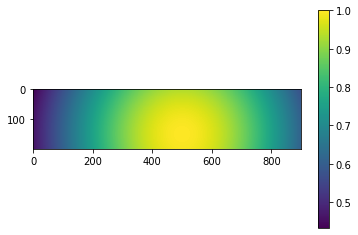

In [3]:
def twoD_Gaussian(x, y, amplitude, xo, yo, D): 
    g = amplitude*np.exp( - ((x-xo)**2 +(y-yo)**2) / (D**2))
    return g

N=1600

# Create x and y indices
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
x, y = np.meshgrid(x, y)

W=800 #width of the quantum dot
H=350 #hight of the quantum dot

D=W**2/(4*H)+H # Diametr of the quantum dot
e_dens = twoD_Gaussian(x, y, 1, 600, 650, D)**2
e_dens=e_dens[L_1:L_2:1,H_1:H_2:1]

plt.figure()
plt.imshow(e_dens)
plt.colorbar()

#savetxt('e_dens.txt', e_dens)

### Calculation of energy gap transitions

/Users/paulsokolov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.


(array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 9 Text yticklabel objects>)

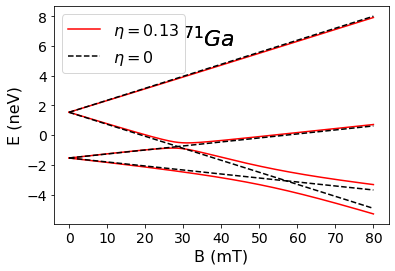

In [4]:
import matplotlib.patches as mpatches
from numpy import linalg as LA

def Splitting(B,angle,isdrawresult,nuclearSpecies,lineSpec,eta,V_ZZ,e_dens):
    global I,L
    if nuclearSpecies == '69Ga':
        Q = 0.171e-24  # [cm^2]
        gamma = 6.43e7 # [rad T^-1 s^-1]
        I = 1.5       # moment
        A_hf=5e4     # Hyperfine constant of the nucleus (neV)
    elif nuclearSpecies == '71Ga': 
        Q = 0.107e-24  
        gamma = 8.18e7 
        I = 1.5     
        A_hf=5e4
    elif nuclearSpecies == '75As':
        Q = 0.314e-24  
        gamma = 4.60e7 
        I = 1.5       
        A_hf=46e3     
    elif nuclearSpecies == '113In':
        Q = 0.759e-24  
        gamma = 5.88e7
        I = 4.5 
        A_hf=5.6e4           
    elif nuclearSpecies == '115In':
        Q = 0.77e-24  
        gamma = 5.9e7
        I = 4.5 
        A_hf=56e3           
    else:
       print ('No such elemt=ent in library!')
    
    global e,h, nuQQ
    
    e = 1.60217648740e-19 #[C]      Electron charge
    StatC = 2997924580   #[cm]      Light speed
    h = 6.626068e-34     # Planck constant
    hp = h/(2*np.pi)        # Planck constant divided by 2pi
    h_ev=6.582119e-7    # Planck constant (neV)
    
    delta_l=1e3         # Spontaneous lifetime broadening (neV)
    
    Vzz = V_ZZ*Q    # Electric field gradient, heree eB is the biaxial strain
    
    nuQ=e*StatC*Vzz/(4*I*(2*I-1)*h*1e7)
       
    L=np.arange(I,-I-1,-1)
    Iz=np.diag(L)
    Iz2=np.diag(L**2)
    Iplus=np.diag(np.sqrt((I+L[:-1])*(I-L[:-1]+1)),1)
    Iminus=Iplus.conj().T
    Iplus2=np.dot(Iplus,Iplus)
    Iminus2=np.dot(Iminus,Iminus)
    
    Bx = B*np.cos(angle);
    Bz = B*np.sin(angle);
    
    global Energies,w0,w1,w2,w3,w4,w5 
    Energies = np.zeros((len(L),len(B)))
    w0=np.zeros(len(B)) 
    w1=np.zeros(len(B))
    w2=np.zeros(len(B))
    w3=np.zeros(len(B))
    w4=np.zeros(len(B))
    w5=np.zeros(len(B))
    
    for i in range (len(B)):    
        H = -gamma*hp*Bz[i]*Iz - gamma*hp*Bx[i]*(Iplus+Iminus)/2 + h*nuQ*(3*Iz2 - I*(I+1)*np.eye(len(L)) + eta*(Iplus2+Iminus2)/2)
        w,v = LA.eigh(H)
        Energies[:,i] = w.conj().T
        eig_vect=np.mat(v)
   
        w0[i]=((A_hf*e_dens)**2)*((abs(eig_vect[1,:]*(Iz*eig_vect[0,:].T)))**2)*((2*(delta_l/h_ev))/((Energies[1,i]/e*1e9-Energies[0,i]/e*1e9)**2+delta_l**2))
        w1[i]=((A_hf*e_dens)**2)*((abs(eig_vect[2,:]*(Iz*eig_vect[1,:].T)))**2)*((2*(delta_l/h_ev))/((Energies[2,i]/e*1e9-Energies[1,i]/e*1e9)**2+delta_l**2))
        w2[i]=((A_hf*e_dens)**2)*((abs(eig_vect[3,:]*(Iz*eig_vect[2,:].T)))**2)*((2*(delta_l/h_ev))/((Energies[3,i]/e*1e9-Energies[2,i]/e*1e9)**2+delta_l**2))
        w3[i]=((A_hf*e_dens)**2)*((abs(eig_vect[2,:]*(Iz*eig_vect[0,:].T)))**2)*((2*(delta_l/h_ev))/((Energies[2,i]/e*1e9-Energies[0,i]/e*1e9)**2+delta_l**2))
        w4[i]=((A_hf*e_dens)**2)*((abs(eig_vect[3,:]*(Iz*eig_vect[0,:].T)))**2)*((2*(delta_l/h_ev))/((Energies[3,i]/e*1e9-Energies[0,i]/e*1e9)**2+delta_l**2))
        w5[i]=((A_hf*e_dens)**2)*((abs(eig_vect[3,:]*(Iz*eig_vect[1,:].T)))**2)*((2*(delta_l/h_ev))/((Energies[3,i]/e*1e9-Energies[1,i]/e*1e9)**2+delta_l**2))    

    B = np.linspace(0,Bmax,num=1001);    
    if isdrawresult == 'true':
        B = B*1e3
        for k in range(len(L)):
            p2=plt.plot(B, Energies[k,:]/e*1e9,lineSpec)
        plt.xlabel('B (mT)',fontsize=16)
        plt.ylabel('E (neV)',fontsize=16)
        
        #cyan_patch = mpatches.Patch(color='cyan', label='$^{71}Ga^{(+3/2)}$',alpha=0.3)
        #red_patch = mpatches.Patch(color='red', label='$^{71}Ga^{(-3/2)}$',alpha=0.3)
        #green_patch= mpatches.Patch(color='green', label='$^{71}Ga^{(+1/2)}$',alpha=0.3)
        #blue_patch = mpatches.Patch(color='blue', label='$^{71}Ga^{(-1/2)}$',alpha=0.3)
        #plt.legend(handles=[cyan_patch,red_patch,green_patch,blue_patch], bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)
    
        plt.text(30, 6,'$^{71}Ga$',fontsize=22, fontdict=None, withdash=False)
      
        #plt.annotate('', xy=(70, 7), xycoords='data',xytext=(70, 9.5), textcoords='data',arrowprops={'arrowstyle': '<->'})
        #plt.annotate('$\pm3/2$',fontsize=18, xy=(15, 1.3), xycoords='data',xytext=(5, 0), textcoords='offset points')
        
        #plt.annotate('', xy=(60, -6), xycoords='data',xytext=(60, -10), textcoords='data',arrowprops={'arrowstyle': '<->'})
        #plt.annotate('$\pm1/2$',fontsize=18, xy=(25, -1.5), xycoords='data',xytext=(5, -10), textcoords='offset points')
       
    Energies = Energies/e*1e9 

Bmax=0.08 #Tesla
B = np.linspace(0, Bmax, num=1001);

ang=90 #90 - Faraday, 0 - Voigt. This angle between x axes and external magnetic field 
angle =(ang+1*(90-np.mean(abs(angles))))*np.pi/180 #degrees, angle between axis x and quadrupole one

Splitting(B, angle,'true', '71Ga','r', np.mean(eta), np.mean(V_ZZ), np.mean(e_dens));

angle =ang*np.pi/180 #degrees, angle between axis x and quadrupole one

Splitting(B, angle,'true', '71Ga','k--', np.mean(0*eta), np.mean(V_ZZ), np.mean(e_dens));
angle =(ang+1*(90-np.mean(abs(angles))))*np.pi/180 #degrees, angle between axis x and quadrupole one

line1 = plt.Line2D([], [], color='r', label='$\eta=0.13$')
line2 = plt.Line2D([], [], color='k',ls='--', label='$\eta = 0$')
plt.legend(handles=[line1,line2],loc='best',fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('Fig_7a_v.eps')